<a href="https://colab.research.google.com/github/balezz/nlp_course/blob/master/8_generation_qa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Генерация текстов и диалоговые системы

### 1. Генерация текстов

Генерация текста - это одна из задач NLP, которая заключается в разработке таких алгоритмов, которые способны выдавать связный текст, полезный для человека.  
Такие алгоритмы являются частью других NLP систем: 
- машинный перевод,
- диалоговые системы, 
- преобразование табличных данных в текст, 
- описание изображений, 
- реферирование текста (summarization) и т.д.  
Источник: [cs224n 12]  

Простая модель генерации текста представлена на рисунке

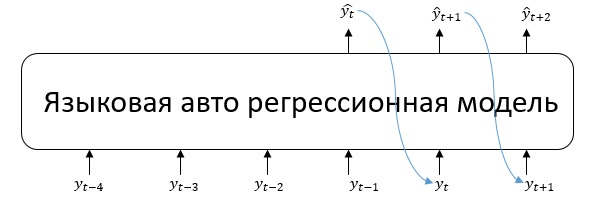

На каждом шаге $t$ модель вычисляет вектор $S$ (scores) для каждого токена в словаре:
$$S= f(\{ y_{<t} \}) $$ 
где $f(..)$ - языковая модель.  

Далее вычисляется распределение вероятностей $P$ среди токенов: 
$$P(y_t=w | \{y_{<t}) = \frac{exp(S_w)}{\sum_{w'\in V} exp(S_{w'})}$$  

Алгоритм декодирования на основании полученного распределения вероятностей $P$ позволяет определить наиболее вероятный токен в последовательности: 
$$\hat{y} = g(P(y_t=w | \{y_{<t}), \{\hat{y}_{<t}\}) $$ 
где $g(..)$ - алгоритм декодирования.

Для декодирования применяют жадные алгоритмы:  
- выбор наиболее вероятного токена на каждом шаге:  
$$\hat{y} = argmax P(y_t=w | \{y_{<t})$$ 
- Beam search (дословно - поиск по лучу) выбор среди нескольких кандитов, с учетом предыдущих токенов. Ширина луча - это количество рассматриваемых кандидатов на каждом шаге.  

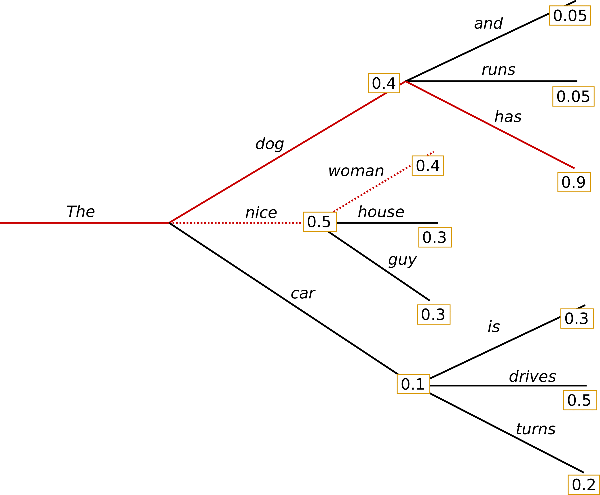


Однако в отличии от систем машинного декодирования, человек часто строит предложения уникальным образом. Вероятность токенов на каждом шаге в человеческом и машинном тексте приведена на рисунке.  

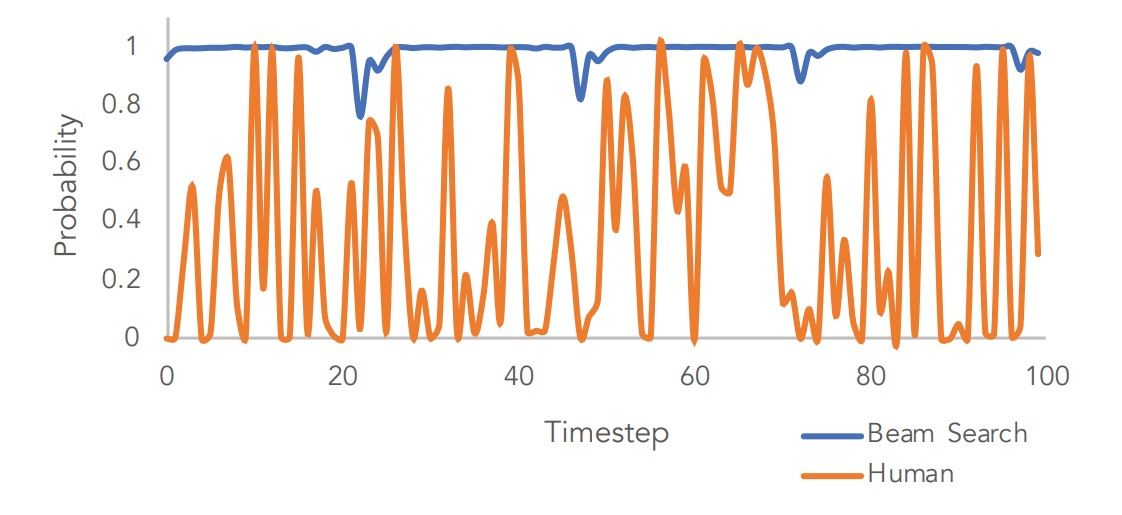

Алгоритм Top-k sampling основан на случайном выборе токена из $k$ наиболее вероятных. 
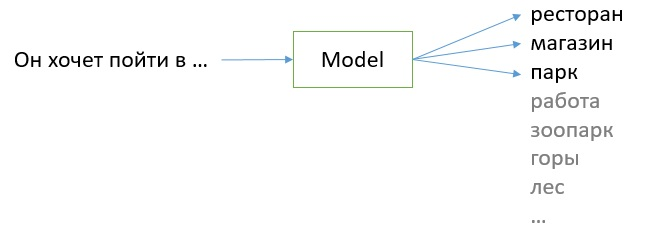

Существуют также и другие улучшенные алгоритмы декодирования:
- top-p sampling - учитывает форму распределения вероятностей;
- перебалансировка вероятностей с учетом статистики N-грамм и т.д.

С возможностью системы генерации текста от Яндекса можно ознакомиться по [ссылке](https://yandex.ru/lab/yalm)

Метрики для оценки качества сгенерированного текста: 
- N-gram overlap (BLEU, ROUGE, METEOR, CIDEr) 
- Semantic overlap (PYRAMID, SPICE, SPIDEr) 
- Model-based (BLEURT)
- Human evaluation

### Системы автоматической генерации ответов на вопросы

С формальной точки зрения диалоговая система способна сгенерировать текстовый ответ $A$ на текстовый вопрос $Q$ 

$$Q \to A$$

Многие задачи NLP сводятся к Reading comprehension (понимание текста). Это алгоритм, дающий ответ на вопрос в заданном контексте $C$ 

$$(C,Q) \to A$$
Контекст и вопрос являются последовательностями слов из словаря $V$ : 
$$C=(c_1, c_2, ..., c_N), Q = (q_1, q_2, ..., q_M), c_i, q_i \in V$$     
Ответ $A$ определяется как позиция слова или словосочетания в контексте $C$:
$$1 \le start \le end \le N $$

Например:  

**C**: Tesla was the fourth of five children. He had an older brother
named Dane and three sisters, Milka, Angelina and Marica.
Dane was killed in a horse-riding accident when Nikola was
five. In 1861, Tesla attended the "Lower" or "Primary" School
in Smiljan where he studied **German**, arithmetic, and
religion. In 1862, the Tesla family moved to Gospić, Austrian
Empire, where Tesla's father worked as a pastor. Nikola
completed "Lower" or "Primary" School, followed by the
"Lower Real Gymnasium" or "Normal School."   
**Q**: What language did Tesla study while in school?  
**A**: German

Для обучения алгоритмов и сравнения их качества используют размеченные датасеты:  
- Stanford question answering dataset (SQuAD) содержит около 100к вопросов, 23к контекстов из википедии.  
- SDSJ Task B включает около 80к вопросов на русском языке.

Для решения задачи используют два семейства алгоритмов: 
- на основе рекуррентных сетей LSTM with attention (2016-2018)  
- на основе предобученной сети BERT (2018-2022)

Более сложной задачей является генерация ответа на вопрос из открытого домена (Open-domain QA).
Домен в этом случае задается большой коллекцией документов $D_1, ..., D_N$, которая не может напрямую использоваться при поиске ответа. 
Для решения используются два алгоритма: 
- Retriever - позволяет получить из домена $K$ документов, наиболее релевантных заданному вопросу (K порядка 100).
$$f(D, Q) \to P_1, ..., P_K$$ 

- Reader - извлекает ответ из найденных докуменов, т.е. задача сводится к Comprehension Reading. 
$$g(Q, {P_1, ..., P_K}) \to A$$